importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading dataset
df=pd.read_csv("census_income.csv")

In [3]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [4]:
#shaping the data
print('Rows:{} columns:{}'.format(df.shape[0],df.shape[1]))

Rows:32561 columns:15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [7]:
#checking for null values
round((df.isnull().sum()/df.shape[0])*100,2).astype(str)+'%'

age               0.0%
workclass         0.0%
fnlwgt            0.0%
education         0.0%
education.num     0.0%
marital.status    0.0%
occupation        0.0%
relationship      0.0%
race              0.0%
sex               0.0%
capital.gain      0.0%
capital.loss      0.0%
hours.per.week    0.0%
native.country    0.0%
income            0.0%
dtype: object

In [8]:
#check for '?'in dataset
round((df.isin(['?']).sum()/df.shape[0])*100,2).astype(str)+'%'


age                0.0%
workclass         5.64%
fnlwgt             0.0%
education          0.0%
education.num      0.0%
marital.status     0.0%
occupation        5.66%
relationship       0.0%
race               0.0%
sex                0.0%
capital.gain       0.0%
capital.loss       0.0%
hours.per.week     0.0%
native.country    1.79%
income             0.0%
dtype: object

In [9]:
income=df['income'].value_counts(normalize=True)
round(income*100,2).astype('str')+'%'

<=50K    75.92%
>50K     24.08%
Name: income, dtype: object

we see we have imbalance problem.Dataset doesnt have any null values but it contains some missing values which is to be filled

In [10]:
#EDA
#we are going to seperate the numeriacal ana categorical data and plot
categorical=df.select_dtypes(include=["object"]).keys()
categorical

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [11]:
Numerical=df.select_dtypes(include=["int64"]).keys()
Numerical

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

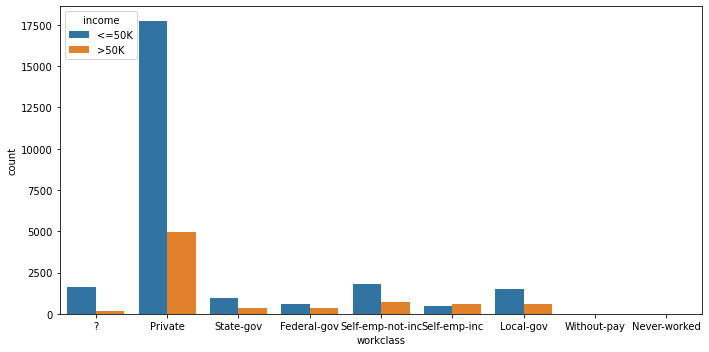

In [12]:
fig=plt.figure(figsize=(10,5))
sns.countplot('workclass',hue='income',data=df)
plt.tight_layout()
plt.show()

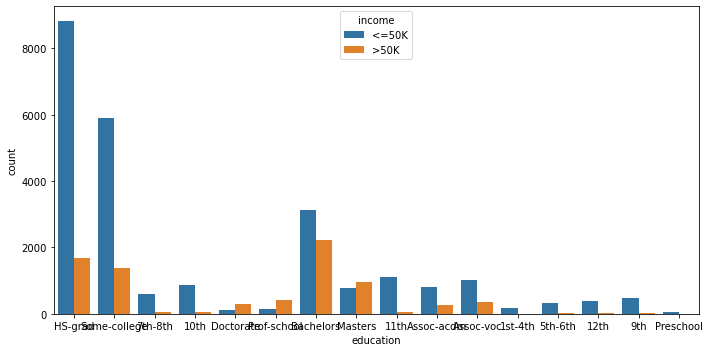

In [13]:
fig=plt.figure(figsize=(10,5))
sns.countplot('education',hue='income',data=df)
plt.tight_layout()
plt.show()

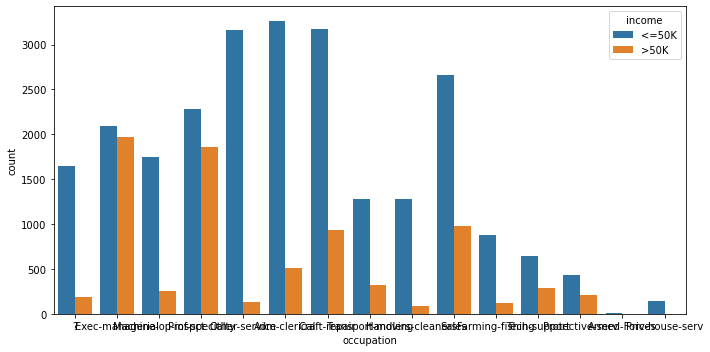

In [14]:
fig=plt.figure(figsize=(10,5))
sns.countplot('occupation',hue='income',data=df)
plt.tight_layout()
plt.show()

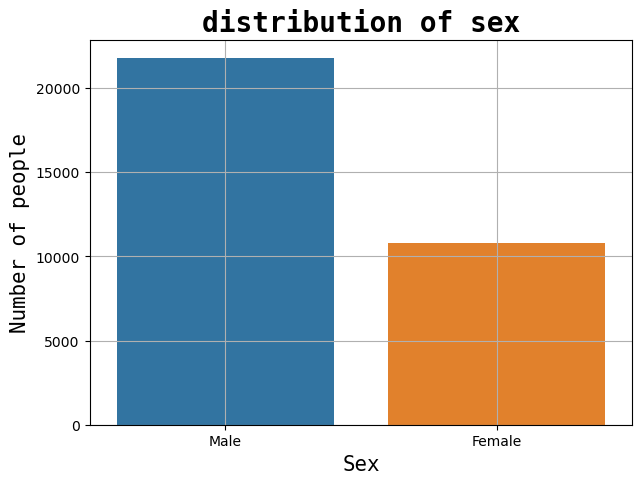

In [15]:
sex=df['sex'].value_counts()
plt.style.use('default')
plt.figure(figsize=(7,5))
sns.barplot(sex.index,sex.values)
plt.title('distribution of sex',fontdict={'fontname':'Monospace','fontsize':20,'fontweight':'bold'})
plt.xlabel('Sex',fontdict={'fontname':'Monospace','fontsize':15})
plt.ylabel('Number of people',fontdict={'fontname':'Monospace','fontsize':15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

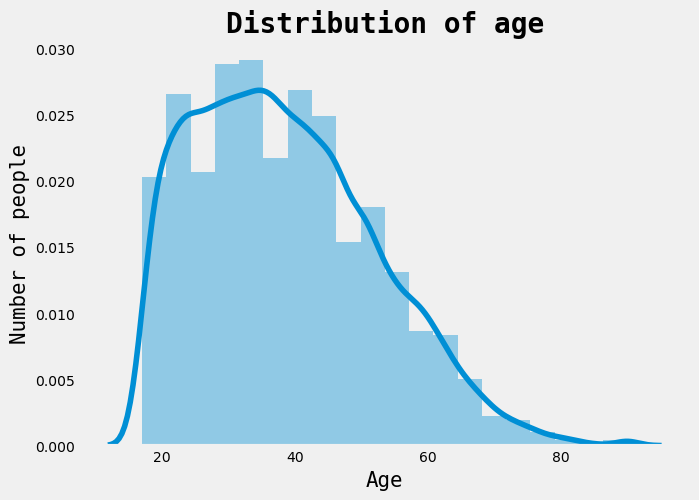

In [16]:
age=df['age'].value_counts()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7,5))
sns.distplot(df['age'], bins=20)
plt.title('Distribution of age',fontdict={'fontname':'Monospace','fontsize':20,'fontweight':'bold'})
plt.xlabel('Age',fontdict={'fontname':'Monospace','fontsize':15})
plt.ylabel('Number of people',fontdict={'fontname':'Monospace','fontsize':15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

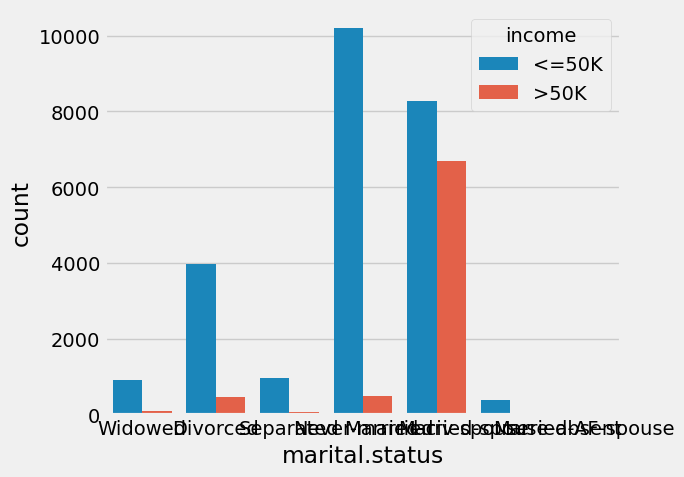

In [17]:
fig=plt.figure(figsize=(7,5))
sns.countplot('marital.status',hue='income',data=df)
plt.tight_layout()
plt.show()

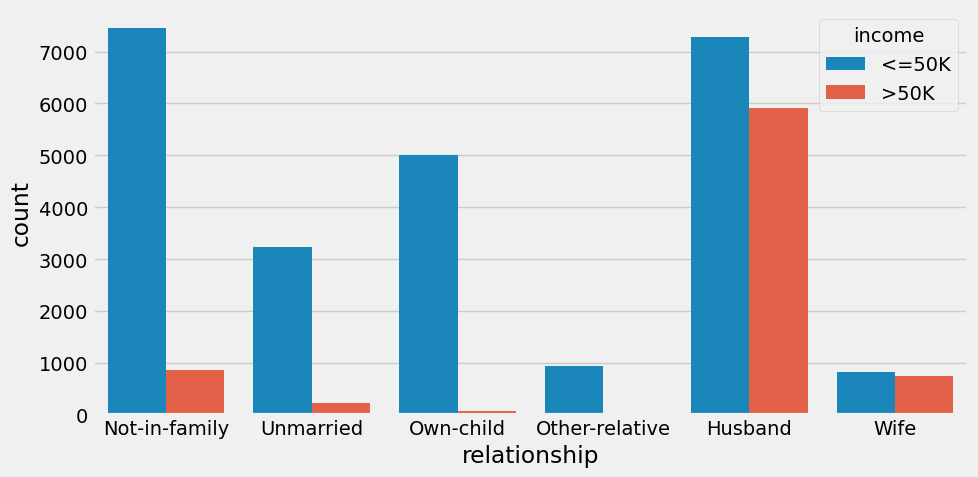

In [18]:
fig=plt.figure(figsize=(10,5))
sns.countplot('relationship',hue='income',data=df)
plt.tight_layout()
plt.show()

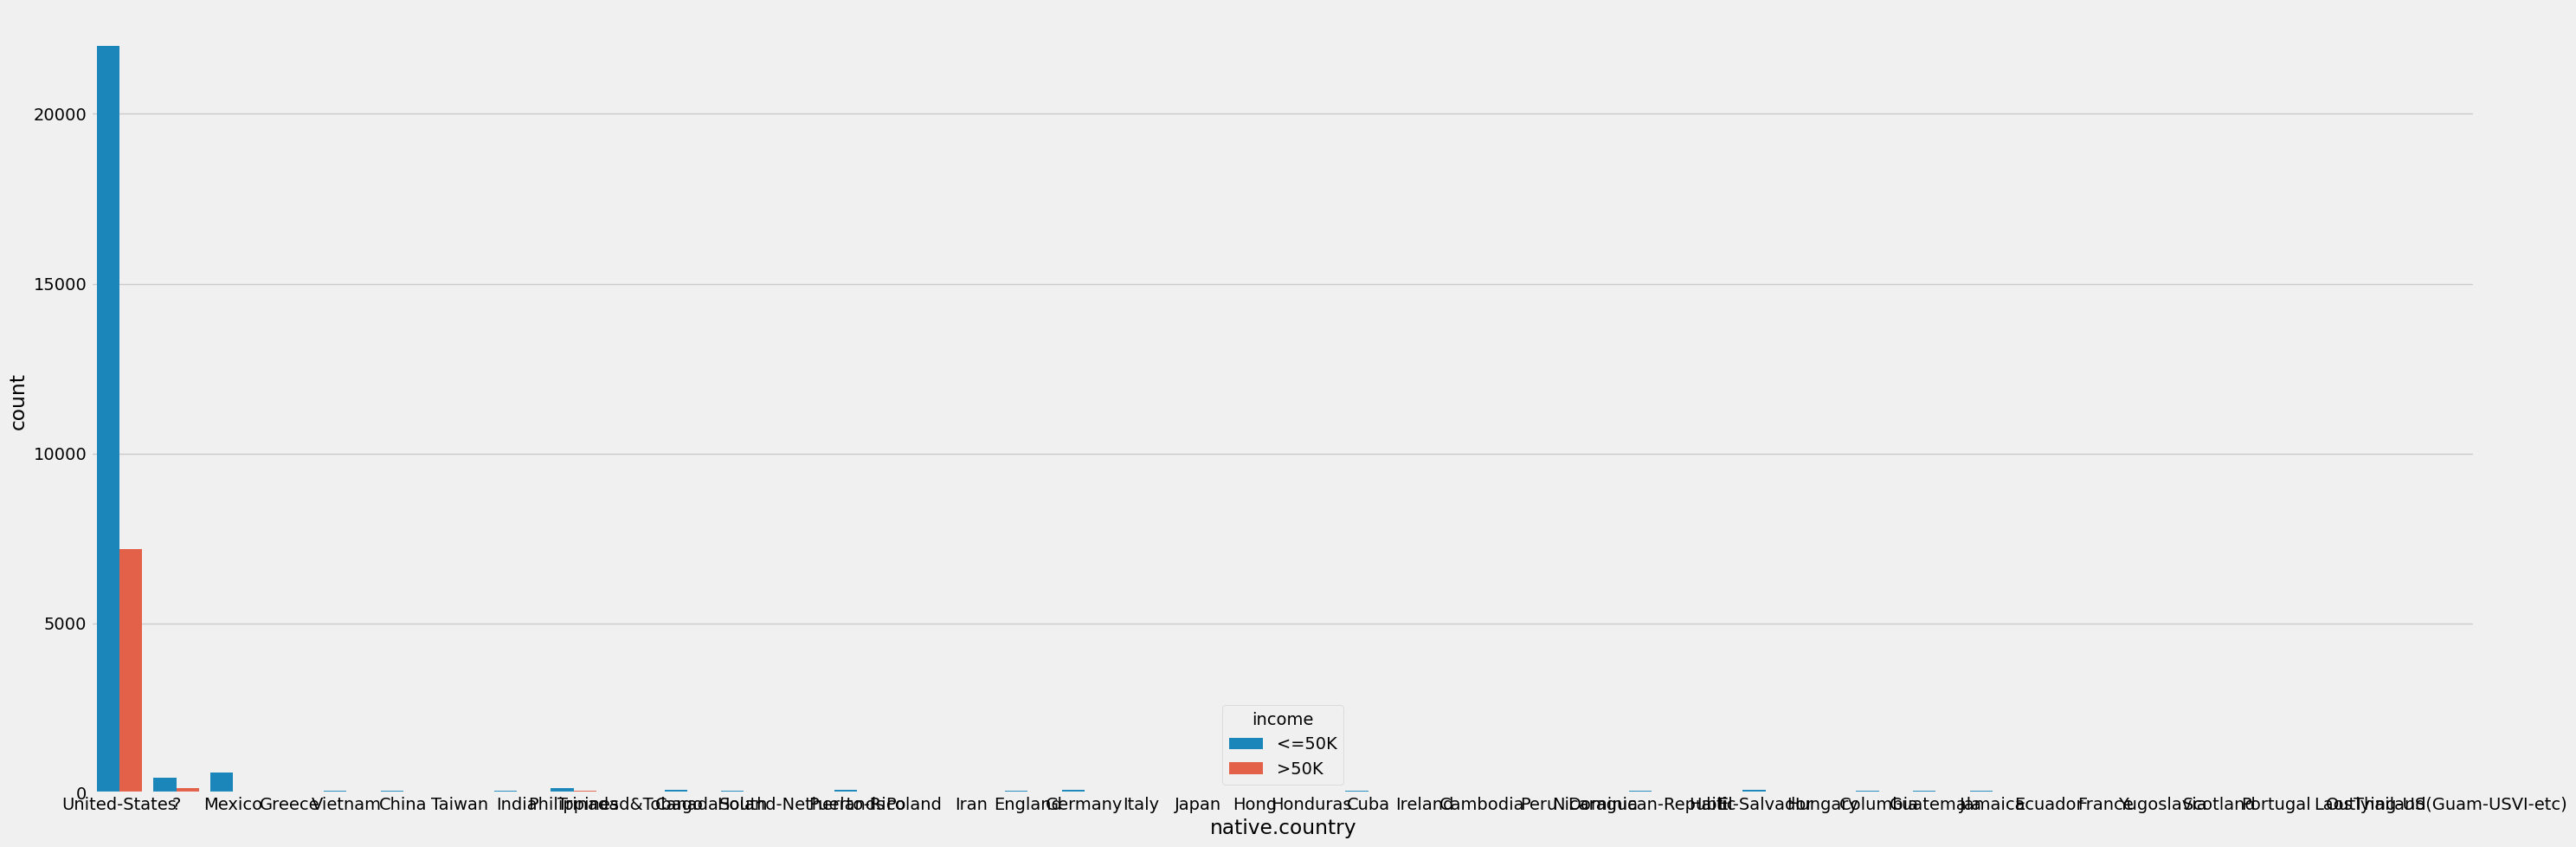

In [19]:
fig=plt.figure(figsize=(30,10))
sns.countplot('native.country',hue='income',data=df)
plt.tight_layout()
plt.show()

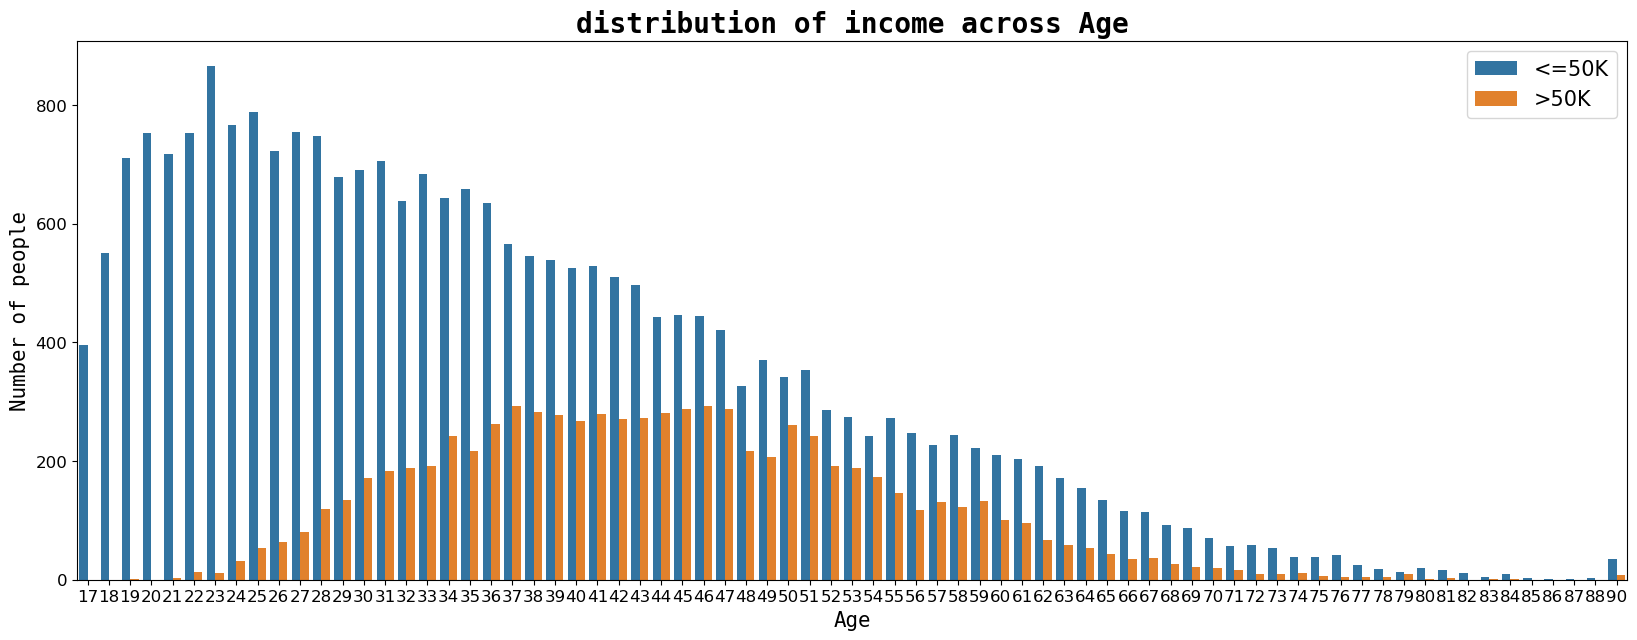

In [20]:
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(df['age'], hue= df['income'])
plt.title('distribution of income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

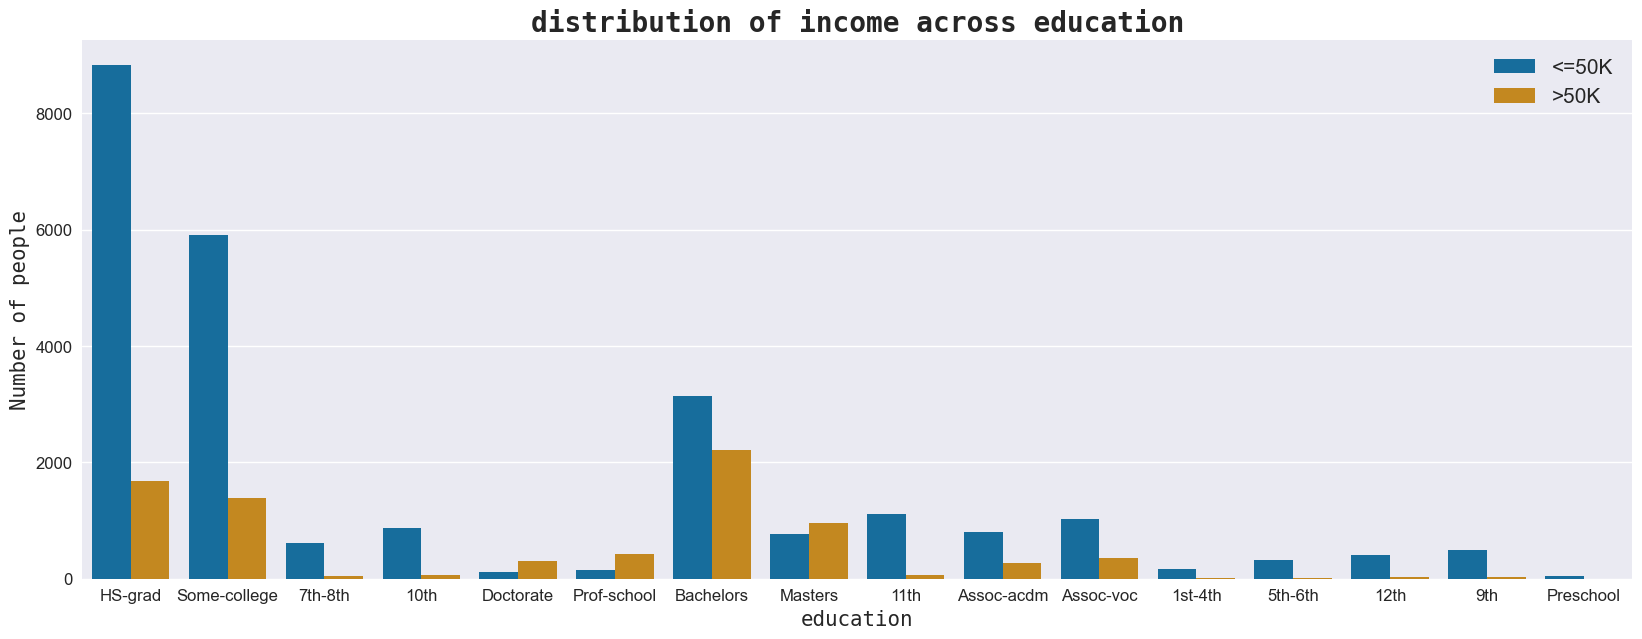

In [21]:
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(df['education'],
              hue=df['income'], palette='colorblind')
plt.title('distribution of income across education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

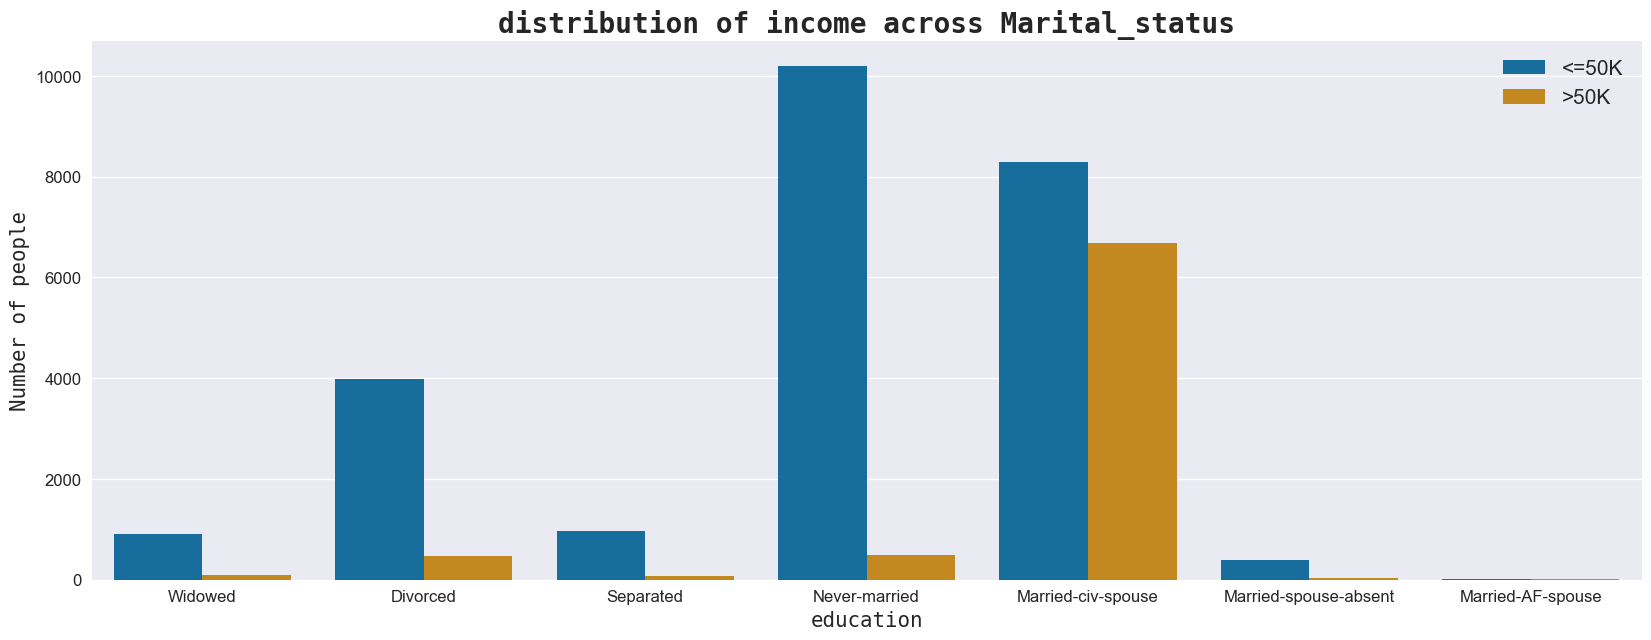

In [22]:
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(df['marital.status'],
              hue=df['income'], palette='colorblind')
plt.title('distribution of income across Marital_status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

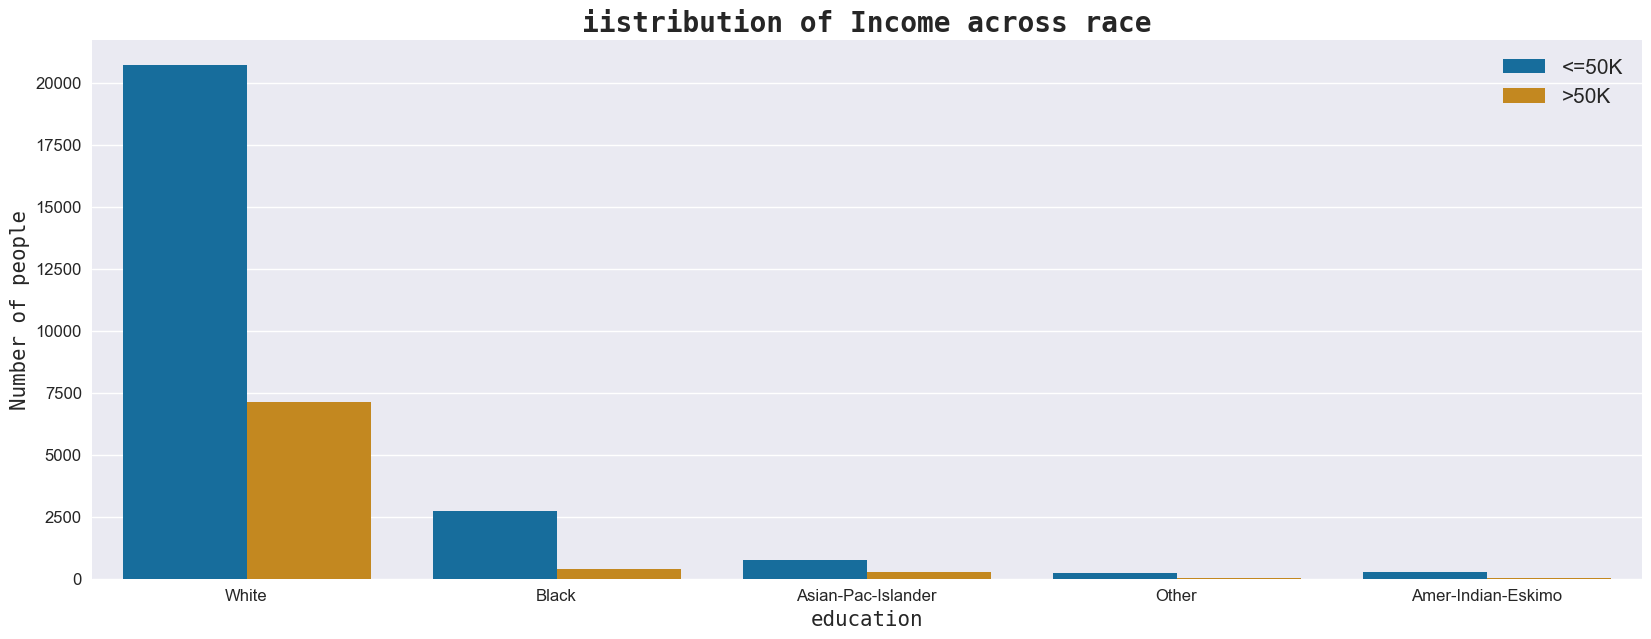

In [23]:
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(df['race'],
              hue=df['income'], palette='colorblind')
plt.title('iistribution of Income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

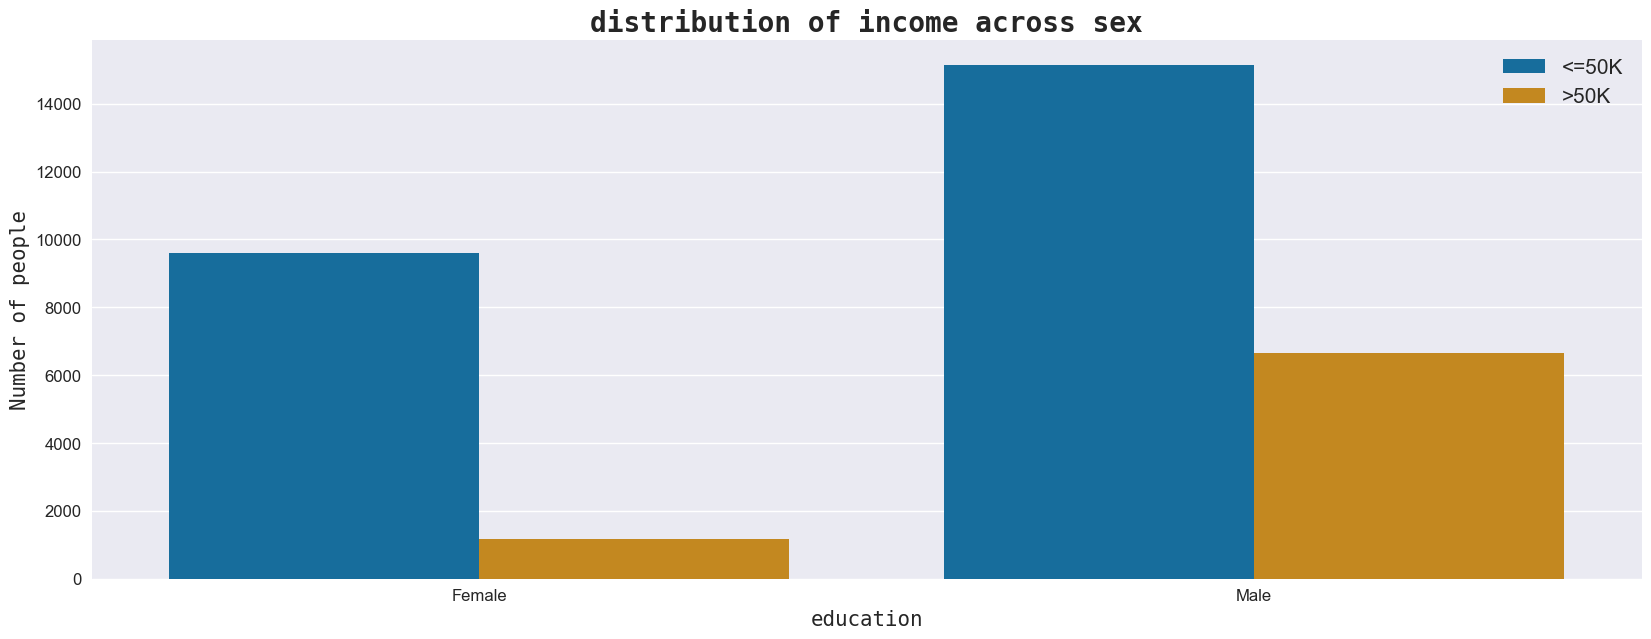

In [24]:
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(df['sex'],
              hue=df['income'], palette='colorblind')
plt.title('distribution of income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

In [25]:
#label encoder is used to convert the income column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [26]:
df['income']=le.fit_transform(df['income'])

#pairplot for the dataset is created for overall multivaraite analysis

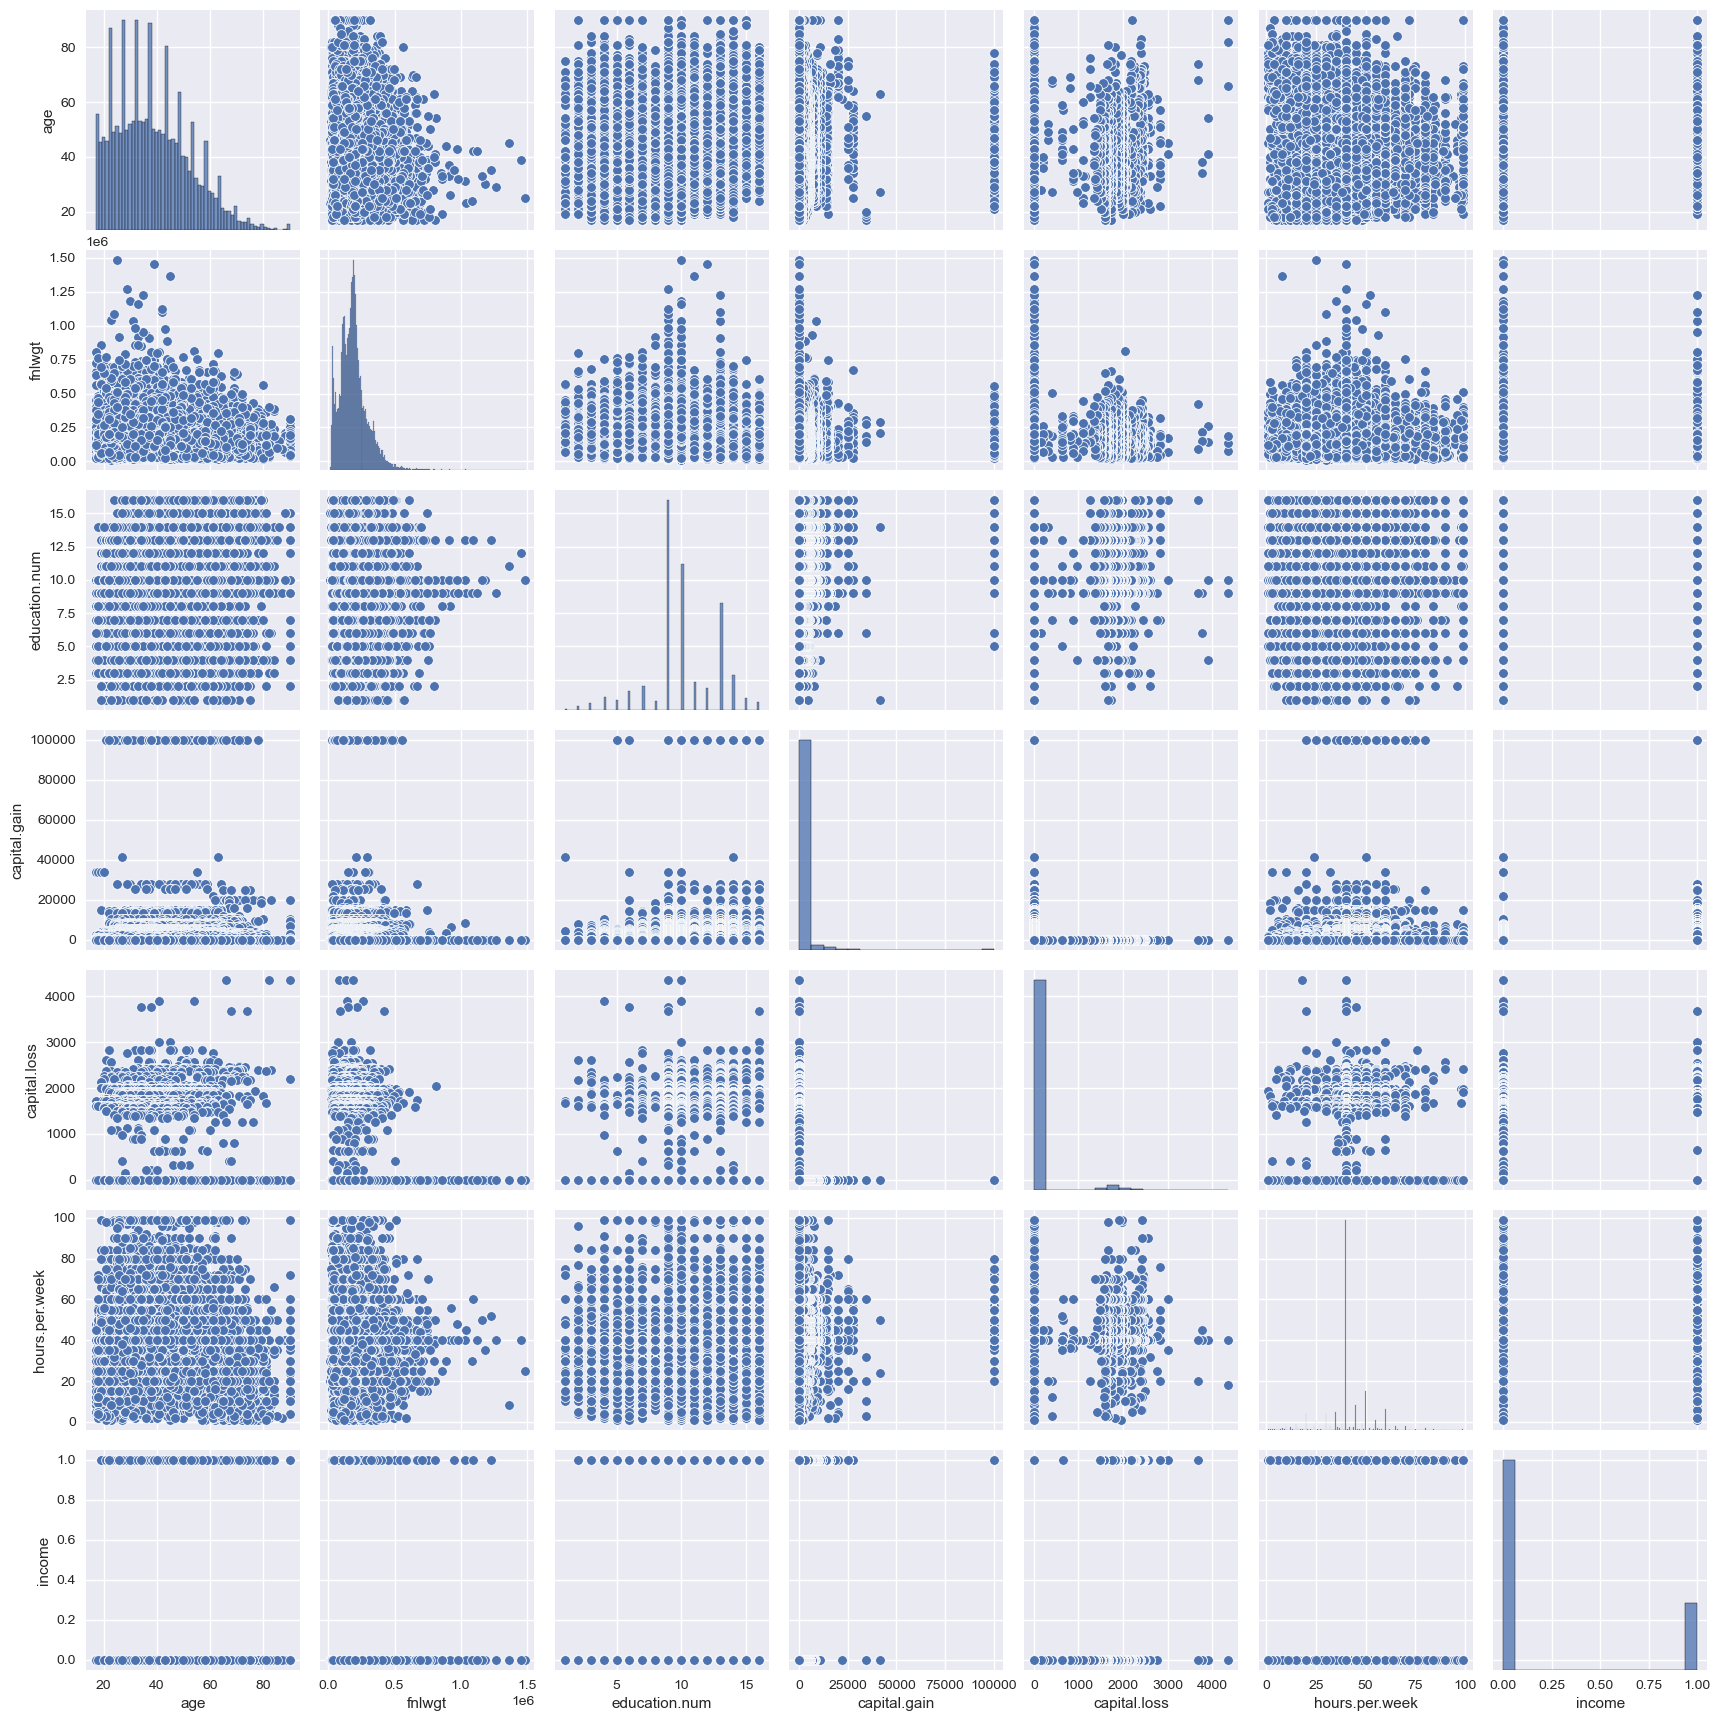

In [27]:
sns.pairplot(df)
plt.show()

#checking for correlation

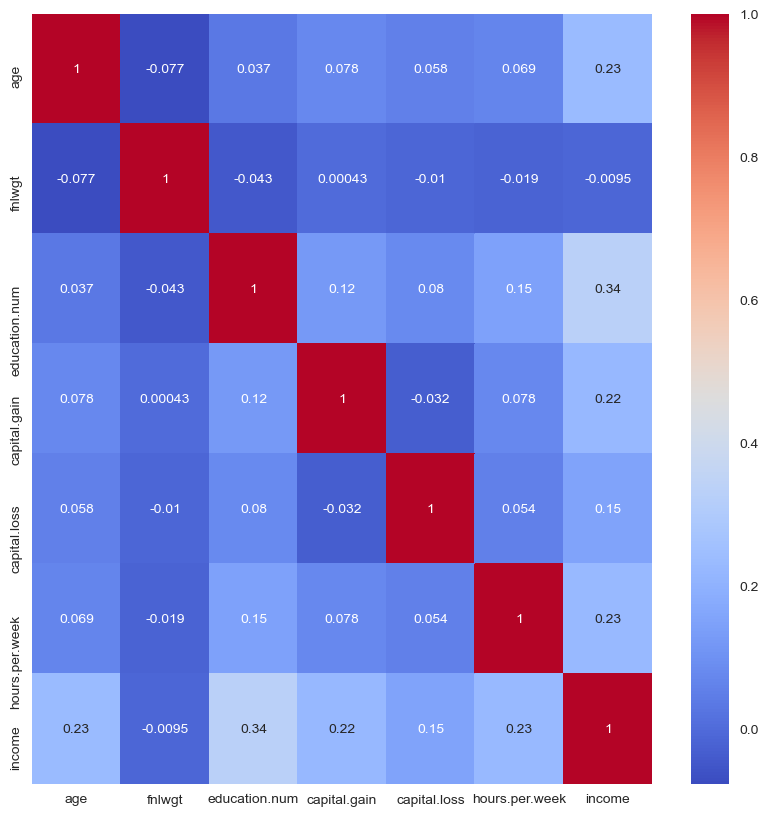

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

from the heatmap we observed that dependent feature income is highly correlated with age,capitalgain,hours per week

#datapreprocessing

In [29]:
#checking for null values
df=df.replace('?',np.nan)

In [30]:
round((df.isnull().sum()/df.shape[0])*100,2).astype(str)+'%'

age                0.0%
workclass         5.64%
fnlwgt             0.0%
education          0.0%
education.num      0.0%
marital.status     0.0%
occupation        5.66%
relationship       0.0%
race               0.0%
sex                0.0%
capital.gain       0.0%
capital.loss       0.0%
hours.per.week     0.0%
native.country    1.79%
income             0.0%
dtype: object

In [31]:
columns_with_nan = ['workclass', 'occupation', 'native.country']

In [32]:
for col in columns_with_nan:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

#feature selection

In [35]:
X=df.drop('income',axis=1)
Y=df['income']

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int32
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int32
 4   education.num   32561 non-null  int64
 5   marital.status  32561 non-null  int32
 6   occupation      32561 non-null  int32
 7   relationship    32561 non-null  int32
 8   race            32561 non-null  int32
 9   sex             32561 non-null  int32
 10  capital.gain    32561 non-null  int64
 11  capital.loss    32561 non-null  int64
 12  hours.per.week  32561 non-null  int64
 13  native.country  32561 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 2.5 MB


In [37]:
X=X.drop(['workclass','education','race','sex','capital.loss','native.country'],axis=1)

In [38]:
#feature scalingfrom 
from sklearn.preprocessing import StandardScaler

In [39]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [40]:
#now solving the imbalance problem
round(Y.value_counts(normalize=True)*100,2).astype('str')+'%'

0    75.92%
1    24.08%
Name: income, dtype: object

#to balance the prblem oversampling is used

In [41]:
!pip3 install imbalanced-learn

In [42]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=42)

In [43]:
ros.fit(X,Y)

RandomOverSampler(random_state=42)

In [44]:
X_resampled,Y_resampled=ros.fit_resample(X,Y)

In [45]:
round(Y_resampled.value_counts(normalize=True)*100,2).astype('str')+'%'

1    50.0%
0    50.0%
Name: income, dtype: object

#creating train-test-split

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_resampled,Y_resampled,test_size=0.2,random_state=42)

#Data modelling

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
lr=LogisticRegression(random_state=42)

In [49]:
lr.fit(X_train,Y_train)

LogisticRegression(random_state=42)

In [50]:
Y_pred_lr=lr.predict(X_test)

In [51]:
#evaluating the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [52]:
print('LogisticRegression:')
print('Accuracy score:',round(accuracy_score(Y_test,Y_pred_lr)*100,2))
print('F1 score:',round(f1_score(Y_test,Y_pred_lr)*100,2))

LogisticRegression:
Accuracy score: 75.25
F1 score: 75.08


In [53]:
from sklearn.svm import SVC
svc=SVC(random_state=42)

In [54]:
svc.fit(X_train,Y_train)

SVC(random_state=42)

In [55]:
Y_pred_svc=svc.predict(X_test)

In [58]:
print('SupportVectorClassifier:')
print('Accuracy score:',round(accuracy_score(Y_test,Y_pred_svc)*100,2))
print('F1 score:',round(f1_score(Y_test,Y_pred_lr)*100,2))

SupportVectorClassifier:
Accuracy score: 81.58
F1 score: 75.08


In [59]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)

In [60]:
rf.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [61]:
Y_pred_rf=rf.predict(X_test)

In [62]:
print('RandomForestClassifier:')
print('Accuracy score:',round(accuracy_score(Y_test,Y_pred_rf)*100,2))
print('F1 score:',round(f1_score(Y_test,Y_pred_lr)*100,2))

RandomForestClassifier:
Accuracy score: 92.6
F1 score: 75.08
